Import all libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Load the dataset from kaggle

In [2]:
data = pd.read_csv("admission_data.csv")
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Display the shape of dataset

In [14]:
data.shape

(500, 8)

Perform preprocessing on dataset

In [17]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Dependent and Independent Features

In [ ]:
X = data.drop("Chance of Admit ", axis=1)  
y = data["Chance of Admit "]

Apply Scaling

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train-test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Model Construction

In [6]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

c:\Users\cheta\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [8]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=300, batch_size=4, verbose=1)

Epoch 1/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1059 - mae: 0.2609 - val_loss: 0.0306 - val_mae: 0.1325
Epoch 2/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0169 - mae: 0.1075 - val_loss: 0.0203 - val_mae: 0.1030
Epoch 3/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0109 - mae: 0.0845 - val_loss: 0.0120 - val_mae: 0.0828
Epoch 4/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0076 - mae: 0.0691 - val_loss: 0.0099 - val_mae: 0.0730
Epoch 5/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0064 - mae: 0.0617 - val_loss: 0.0091 - val_mae: 0.0661
Epoch 6/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0059 - mae: 0.0586 - val_loss: 0.0069 - val_mae: 0.0581
Epoch 7/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0050 - mae: 0.0541 - val_loss: 0.0065 - val_mae: 0.0557
Epoch 8/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044 - mae: 0.0511 - val_loss: 0.0067 - val_mae: 0.0576
Epoch 9/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.004

In [9]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, MAE: {mae:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0065 - mae: 0.0571
Test Loss: 0.0065, MAE: 0.0571


In [10]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [11]:
from sklearn.metrics import r2_score

# After model.predict
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")


R² Score: 0.6846


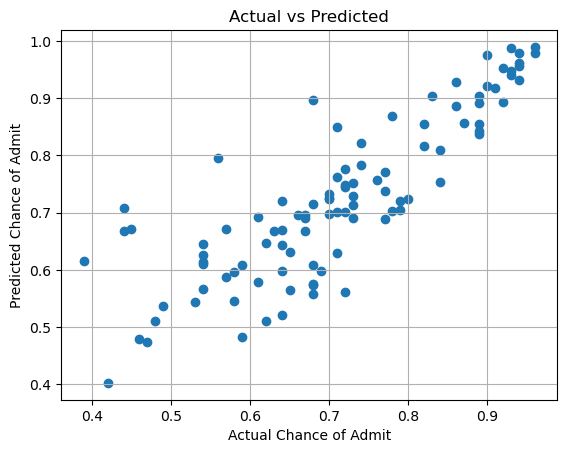

In [12]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Chance of Admit")
plt.ylabel("Predicted Chance of Admit")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()